<a href="https://colab.research.google.com/github/harishkumarsg/Analyzing-selling-price-of-used-cars/blob/main/Analyzing_Selling_Price_of_Used_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('/content/output.csv')

# Removing the first column if it’s an index column
df = df.iloc[:, 1:]

# Checking the first 5 rows of the dataset
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
headers = ["symboling", "normalized-losses", "make",
           "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location",
           "wheel-base", "length", "width", "height", "curb-weight",
           "engine-type", "num-of-cylinders", "engine-size",
           "fuel-system", "bore", "stroke", "compression-ratio",
           "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

df.columns = headers

# Checking the dataset after renaming the columns
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
print(df.isna().any())
print(df.isnull().any())

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool
symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length          

In [5]:
df['city-mpg'] = 235 / df['city-mpg']
df.rename(columns={'city-mpg': 'city-L / 100km'}, inplace=True)

# Checking the column names after the modification
print(df.columns)

# Checking data types of columns
print(df.dtypes)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L / 100km',
       'highway-mpg', 'price'],
      dtype='object')
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke              

In [6]:
df = df[df['price'] != '?']

# Convert 'price' column to integers
df['price'] = df['price'].astype(int)

# Verifying data types again
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-L / 100km       float64
highway-mpg            int64
price                  int64
dtype: object


<ipython-input-6-312cd3df178f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(int)


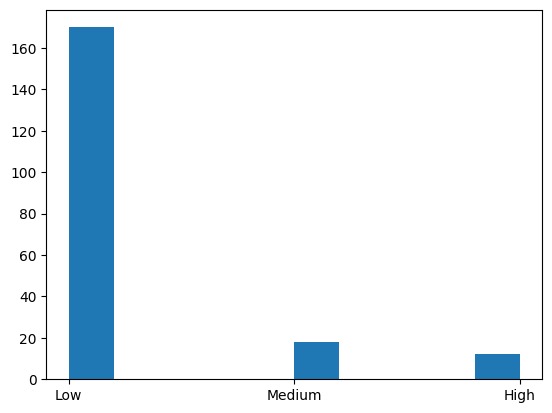

In [7]:
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()

# Binning 'price' into categories
bins = np.linspace(min(df['price']), max(df['price']), 4)  # 3 bins
group_names = ['Low', 'Medium', 'High']
df['price-binned'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True)

# Plotting histogram of binned 'price'
plt.hist(df['price-binned'])
plt.show()

In [8]:
fuel_type_dummies = pd.get_dummies(df['fuel-type'])
print(fuel_type_dummies.head())

# Descriptive statistics (ignoring NaN values)
print(df.describe())

   diesel   gas
0   False  True
1   False  True
2   False  True
3   False  True
4   False  True
        symboling  wheel-base      length       width      height  \
count  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.830000   98.848000    0.837232    0.915250    0.899523   
std      1.248557    6.038261    0.059333    0.029207    0.040610   
min     -2.000000   86.600000    0.678039    0.837500    0.799331   
25%      0.000000   94.500000    0.800937    0.891319    0.869565   
50%      1.000000   97.000000    0.832292    0.909722    0.904682   
75%      2.000000  102.400000    0.881788    0.926042    0.928512   
max      3.000000  120.900000    1.000000    1.000000    1.000000   

       curb-weight  engine-size  compression-ratio  city-L / 100km  \
count   200.000000   200.000000         200.000000      200.000000   
mean   2555.705000   126.860000          10.170100        9.937914   
std     518.594552    41.650501           4.014163        2.539415   
mi

        symboling  wheel-base      length       width      height  \
count  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.830000   98.848000    0.837232    0.915250    0.899523   
std      1.248557    6.038261    0.059333    0.029207    0.040610   
min     -2.000000   86.600000    0.678039    0.837500    0.799331   
25%      0.000000   94.500000    0.800937    0.891319    0.869565   
50%      1.000000   97.000000    0.832292    0.909722    0.904682   
75%      2.000000  102.400000    0.881788    0.926042    0.928512   
max      3.000000  120.900000    1.000000    1.000000    1.000000   

       curb-weight  engine-size  compression-ratio  city-L / 100km  \
count   200.000000   200.000000         200.000000      200.000000   
mean   2555.705000   126.860000          10.170100        9.937914   
std     518.594552    41.650501           4.014163        2.539415   
min    1488.000000    61.000000           7.000000        4.795918   
25%    2163.000000    97.750

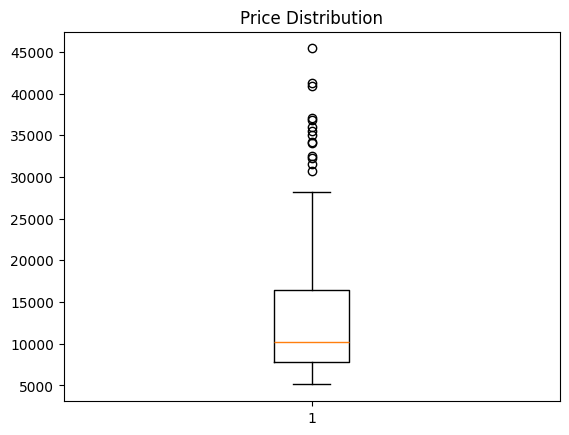

In [9]:
print(df.describe())

# Boxplot of 'price' column
plt.boxplot(df['price'])
plt.title('Price Distribution')
plt.show()

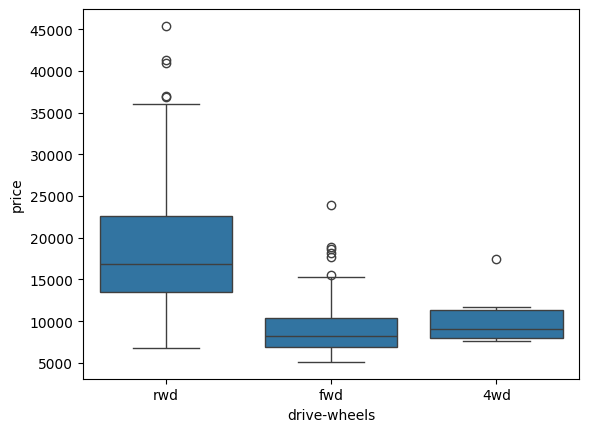

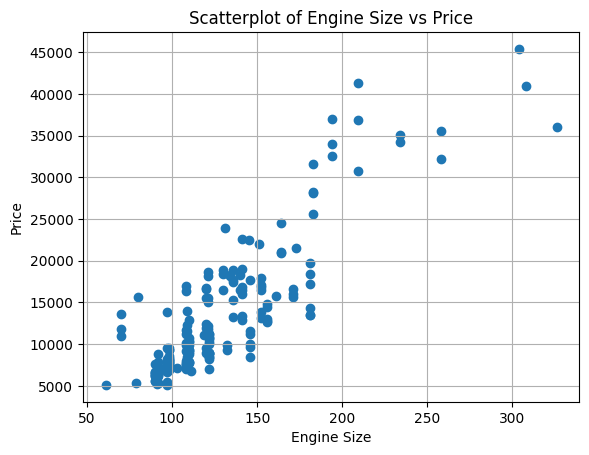

In [10]:
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.show()

# Scatter plot of engine size vs price
plt.scatter(df['engine-size'], df['price'])
plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [11]:
grouped_data = df[['drive-wheels', 'body-style', 'price']].groupby(['drive-wheels', 'body-style'], as_index=False).mean()
print(grouped_data)

   drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  26563.250000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222


<ipython-input-12-fb8de82d05b6>:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


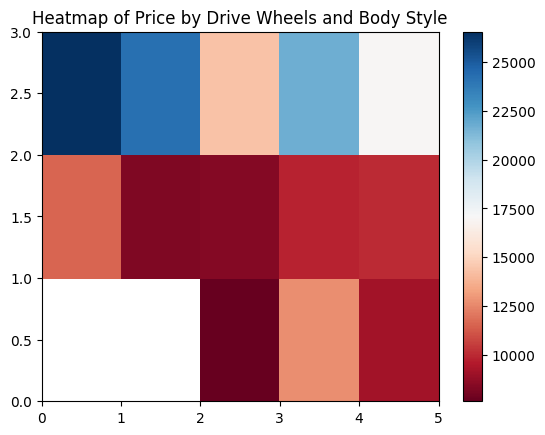

In [12]:
data_pivot = grouped_data.pivot(index='drive-wheels', columns='body-style', values='price')

# Heatmap for visualizing the relationship
plt.pcolor(data_pivot, cmap='RdBu')
plt.colorbar()
plt.title('Heatmap of Price by Drive Wheels and Body Style')
plt.show()

In [13]:
data_annova = df[['make', 'price']]
grouped_annova = data_annova.groupby('make')

# Perform ANOVA test (comparing prices of Honda and Subaru)
annova_results = stats.f_oneway(
    grouped_annova.get_group('honda')['price'],
    grouped_annova.get_group('subaru')['price']
)
print(annova_results)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


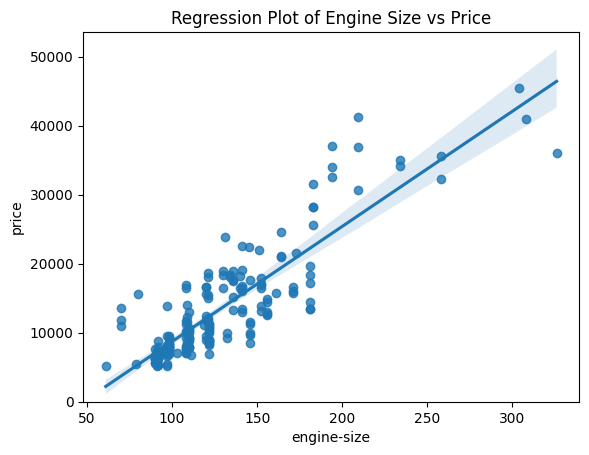

In [14]:
sns.regplot(x='engine-size', y='price', data=df)
plt.title('Regression Plot of Engine Size vs Price')
plt.ylim(0, )  # Optional, limits y-axis
plt.show()


THIS PROJECT WAS DONE BY HARISH KUMAR S G
